In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Import data and drop rows with missing labels
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"] , inplace=True)

#Setup random seed
np.random.seed(42)

# Getting data ready
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV

def evaluate_preds(y_true , y_pred):
    """
    
    """
    R2 = r2_score(y_true , y_pred)
    mae = mean_absolute_error(y_true , y_pred)
    mse = mean_squared_error(y_true , y_pred)

    metric_dict ={"R2":round(R2,2),
                  "mae":round(mae,2),
                  "mse":round(mse,2)}

    print(f"The r2_score is : {R2:.2f}")
    print(f"The Mean-Absolute-Error is : {mae:.2f}")
    print(f"The Mean-Sqaured-Error is : {mse:.2f}")

    return metric_dict

#Define different features and transformer pipeline
categorical_features = ["Make" , "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy="constant" , fill_value="missing")),
     ("OneHot" , OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy="constant" , fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer" , SimpleImputer(strategy="mean"))])

#Setup preprocessing steps (fill missing values,then convert to numbers)
preprocessor = ColumnTransformer(
                     transformers=[
                         ("cat", categorical_transformer , categorical_features),
                         ("door", door_transformer , door_feature),
                         ("numeric" , numeric_transformer , numeric_feature)])

#Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model" , RandomForestRegressor(n_jobs=1))])

# use GridSearchCV with our regression pipeline
pipe_grid = {"preprocessor__numeric__imputer__strategy":["mean","median"],
            "model__n_estimators":[100,1000],
            "model__max_depth":[None,5],
            "model__max_features":["sqrt"],
            "model__min_samples_split":[2,4]}

#Shuffle the data
data_shuffled = data.sample(frac=1)

#Split the data
x = data_shuffled.drop("Price" , axis=1)
y = data_shuffled["Price"]

#Split into train and test sets
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

gs_model = GridSearchCV(model,
                        param_grid = pipe_grid,
                        cv=5,
                        verbose=2)
#Fit the GridSearchCV version of model
gs_model.fit(x_train , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   2.9s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   2.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numeric__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=None, model__max_features=sq

,estimator,Pipeline(step...r(n_jobs=1))])
,param_grid,"{'model__max_depth': [None, 5], 'model__max_features': ['sqrt'], 'model__min_samples_split': [2, 4], 'model__n_estimators': [100, 1000], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('door', ...), ...]"


In [12]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
np.random.seed(42)
gs_y_preds = gs_model.predict(x_test)
gs_metrics = evaluate_preds(y_test , gs_y_preds)

The r2_score is : 0.31
The Mean-Absolute-Error is : 5588.16
The Mean-Sqaured-Error is : 48523255.11


C:\Users\Lenovo\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\matplotlib\colors.py:2242: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Lenovo\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\matplotlib\colors.py:2249: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
C:\Users\Lenovo\OneDrive\Desktop\sample_project_1\env\Lib\site-packages\matplotlib\ticker.py:561: UserWarning: Warning: converting a masked element to nan.
  else fmt % arg)


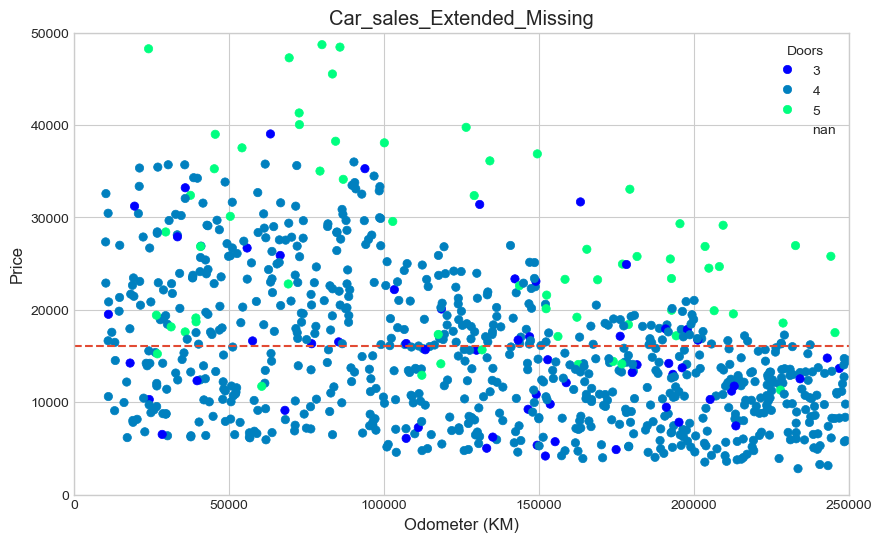

In [24]:
plt.style.use('seaborn-v0_8-whitegrid')
#plt.style.use('ggplot')

fig,ax =plt.subplots(figsize=(10,6))

scatter = ax.scatter(x=data["Odometer (KM)"],
                     y=data["Price"],
                     c=data["Doors"],
                     cmap="winter")
ax.set(title="Car_sales_Extended_Missing",
       xlabel="Odometer (KM)",
       ylabel="Price")

ax.set_xlim([0,250000])
ax.set_ylim([0,50000])

ax.legend(*scatter.legend_elements(),title="Doors")

ax.axhline(y=data["Price"].mean(),
           linestyle="--")

plt.show()